<a href="https://colab.research.google.com/github/MohsenLotfii/School_electricity/blob/main/1_Schools_electricity_Cluster_based_on_Mech_eq_(Jan_Feb_2023_24)__06_Nov_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


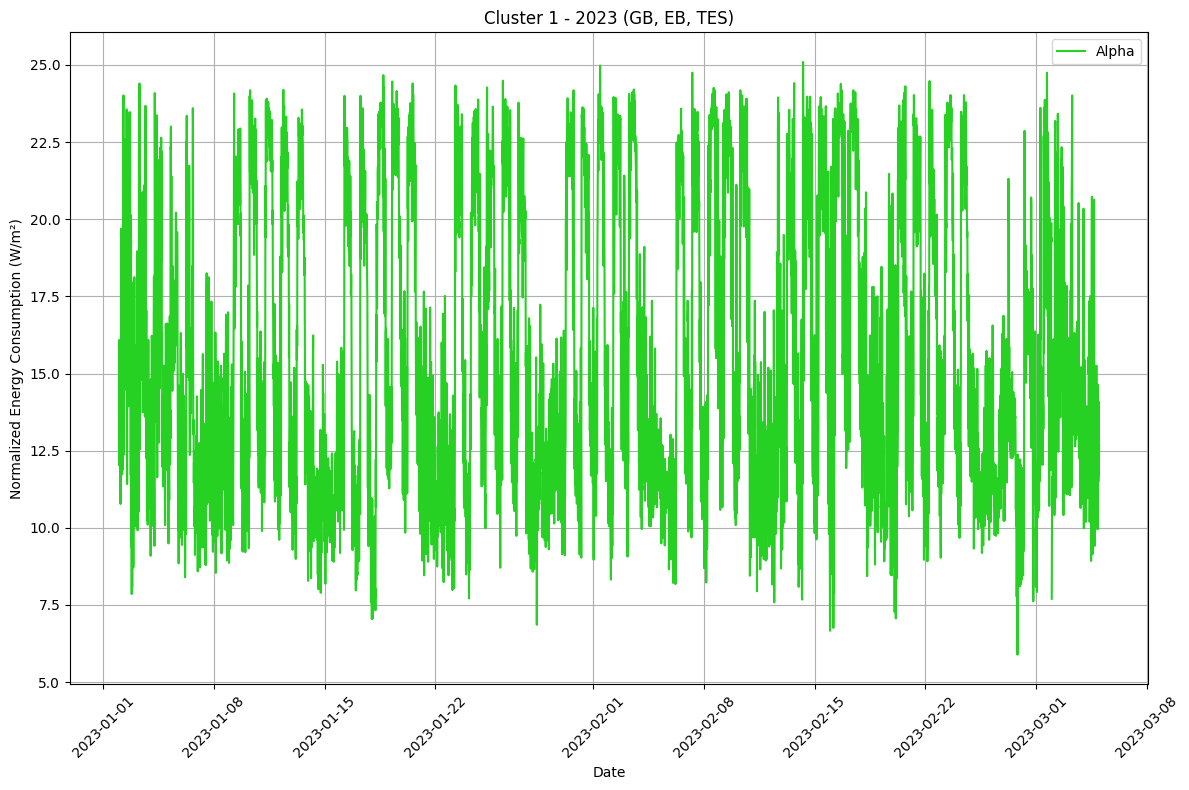

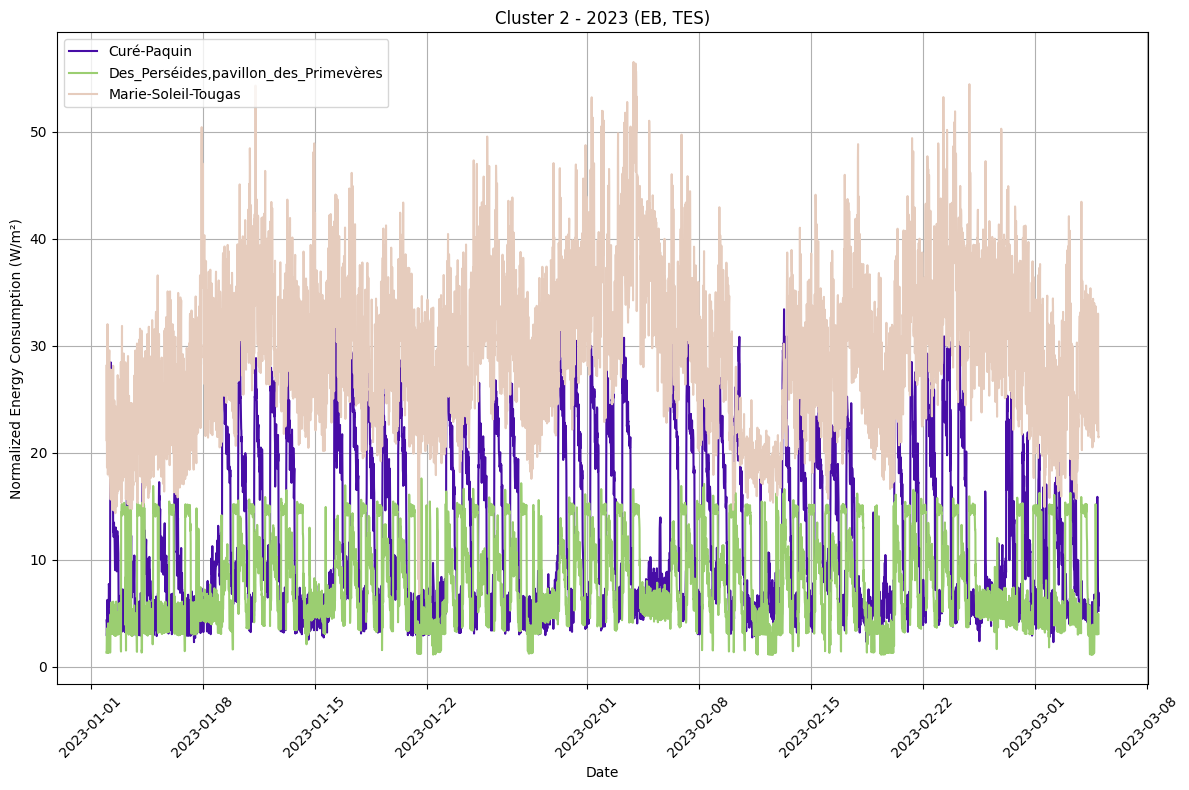

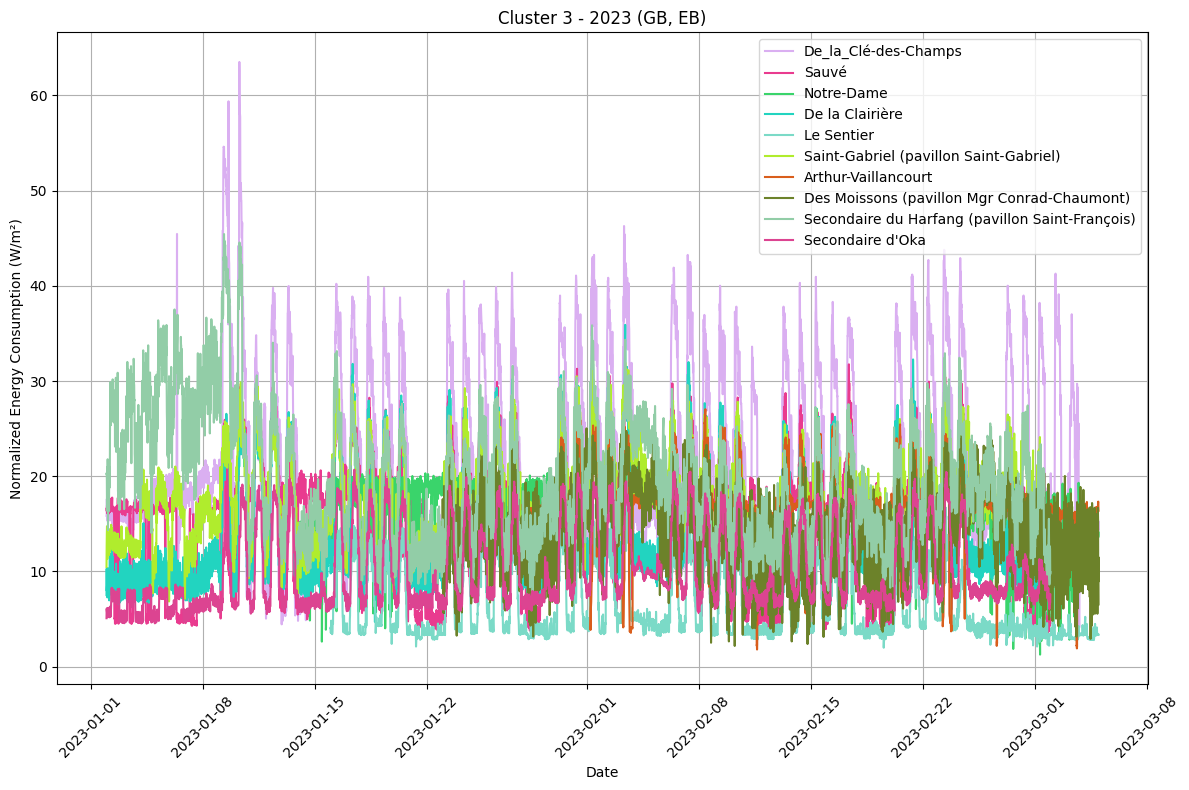

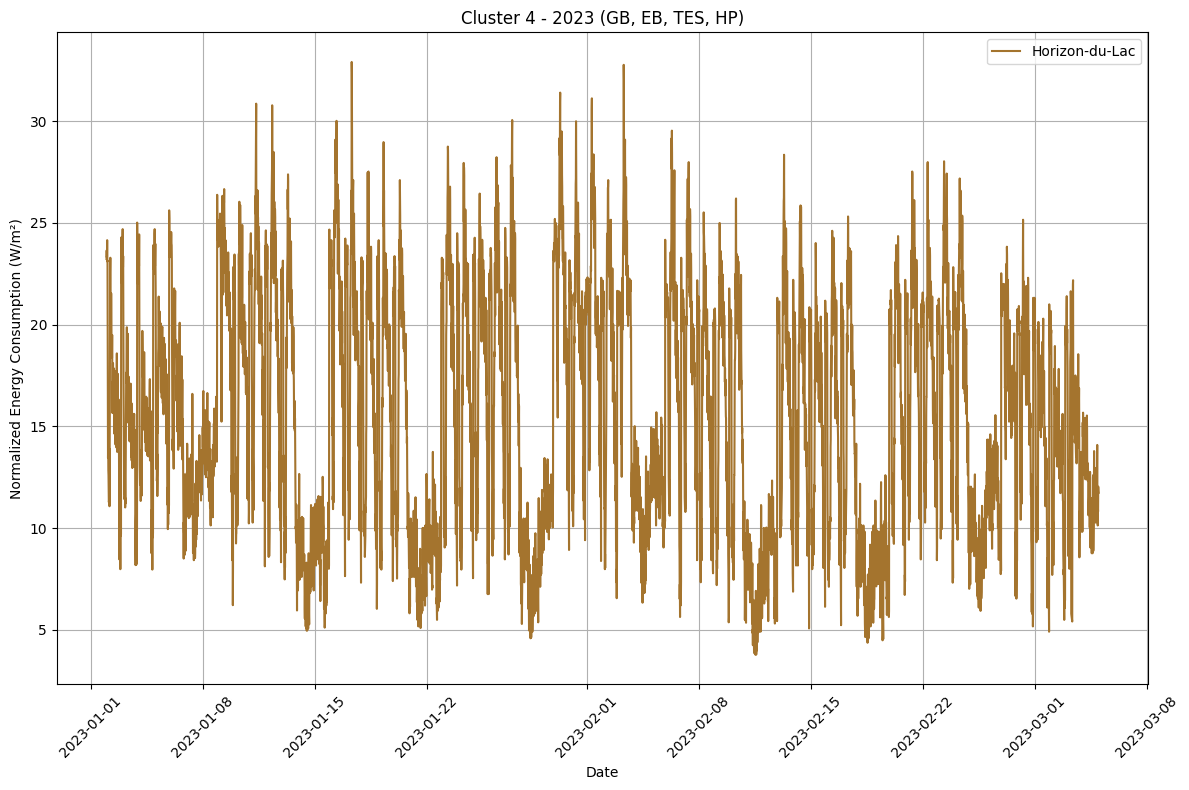

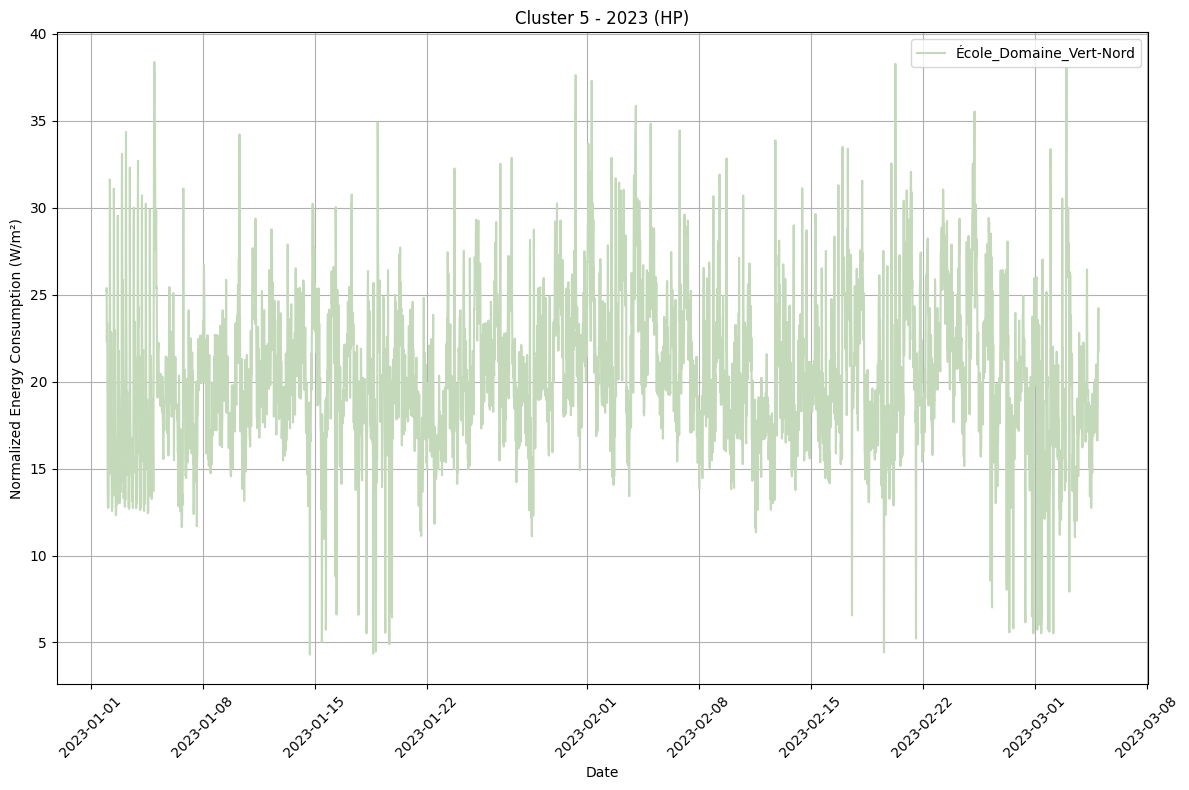

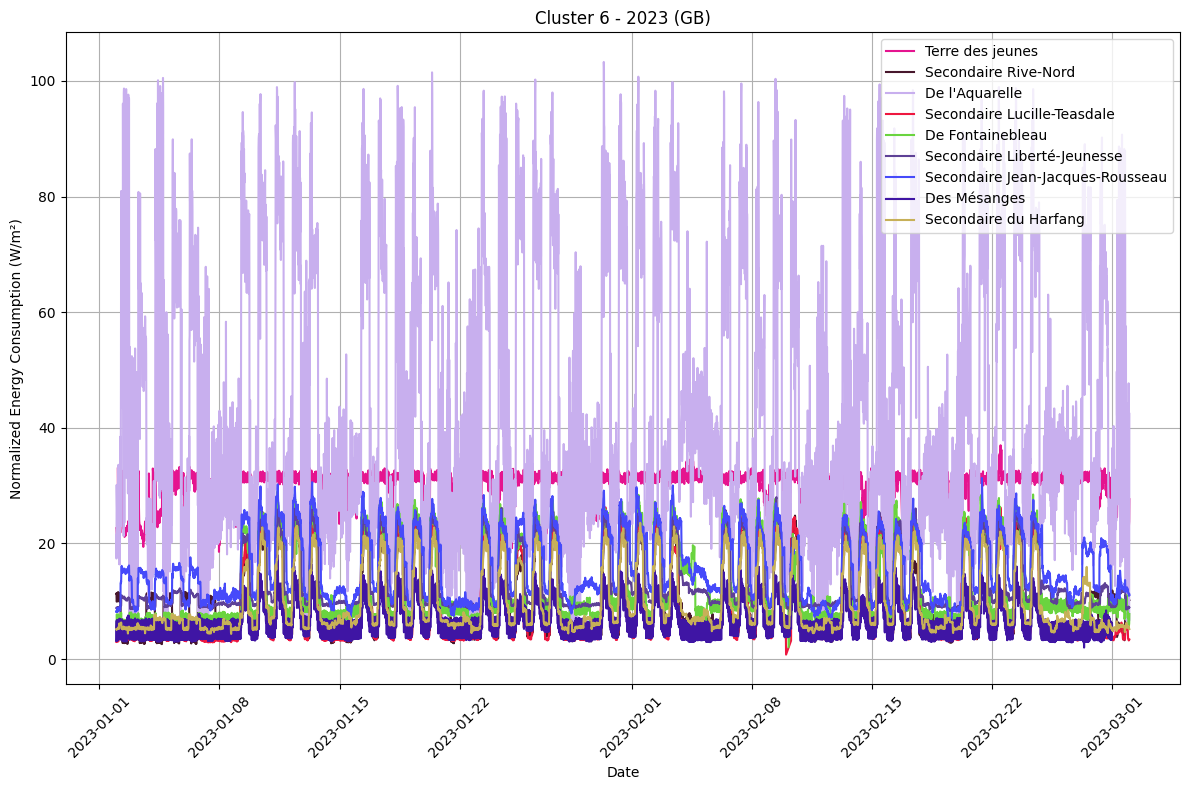

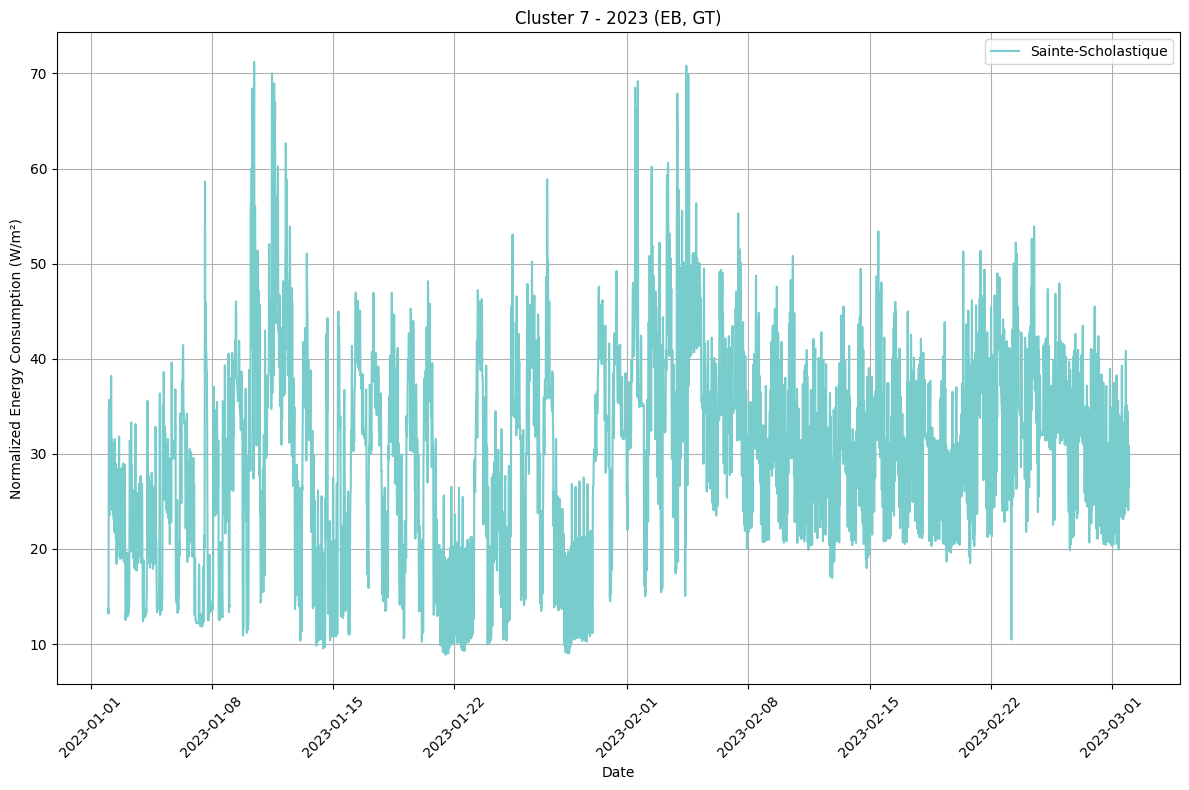

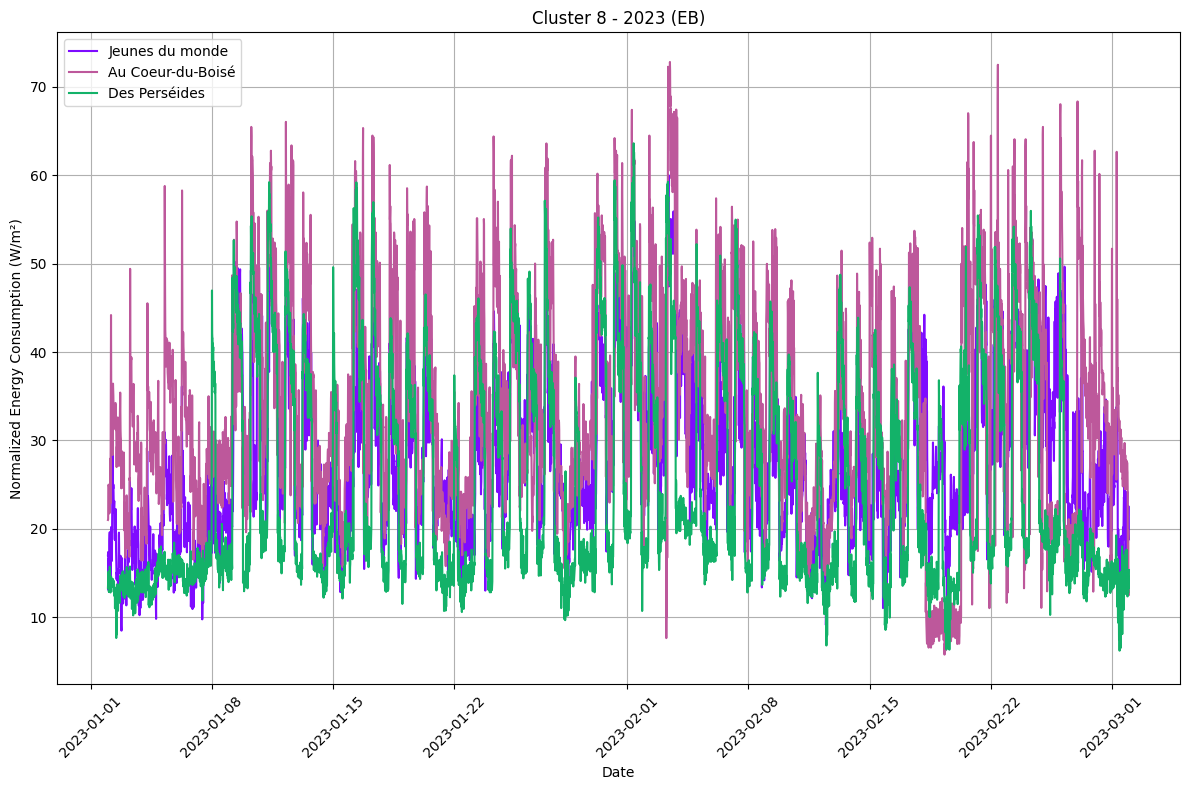

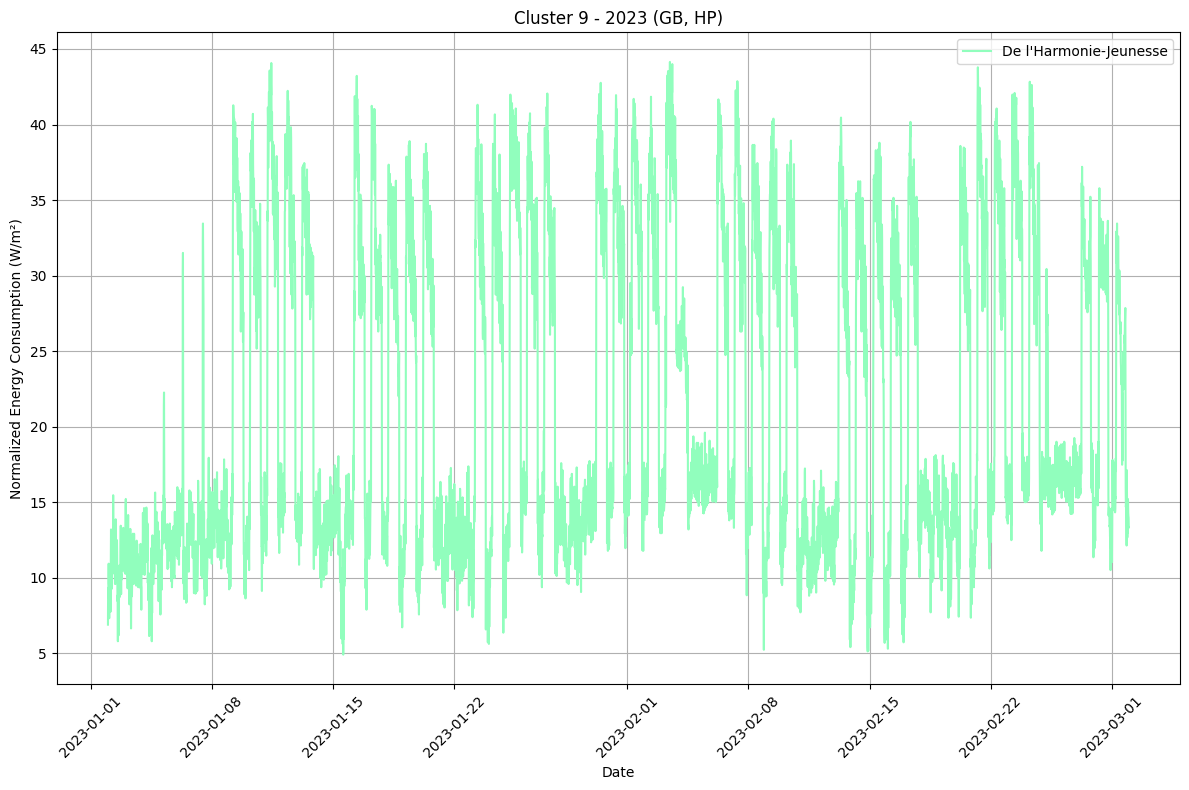

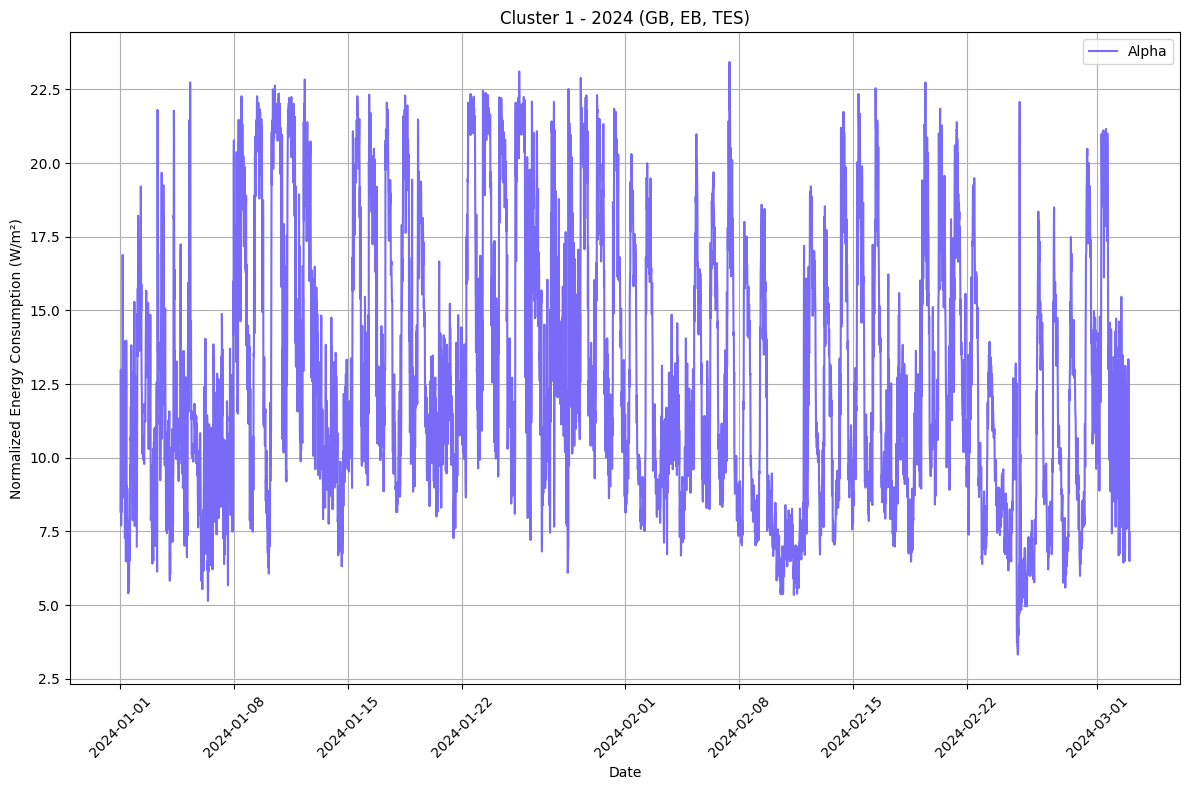

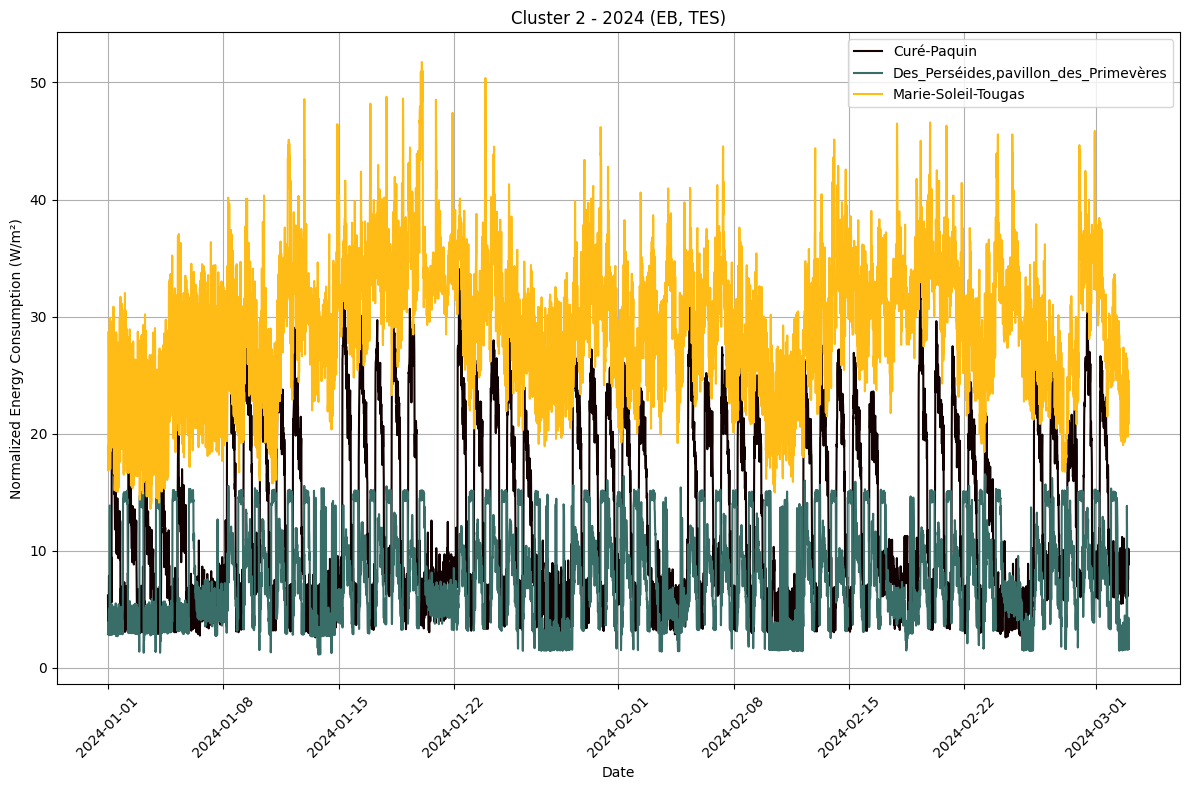

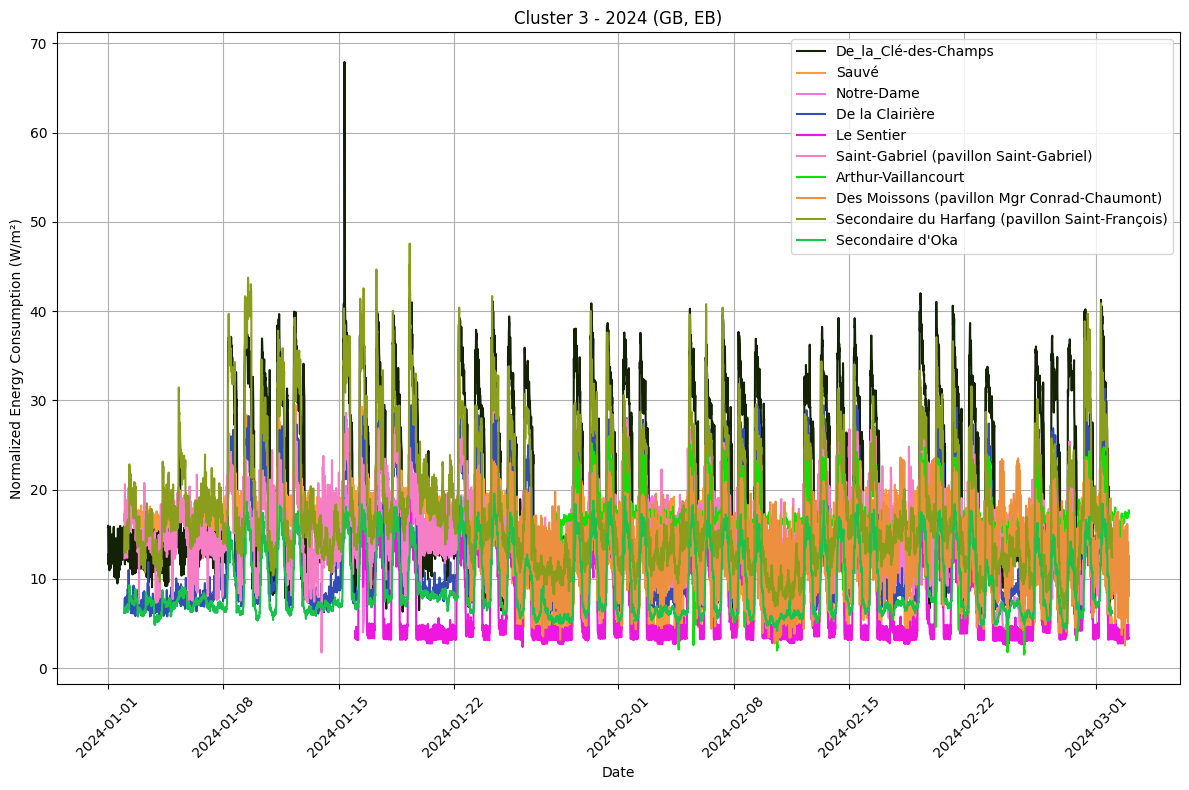

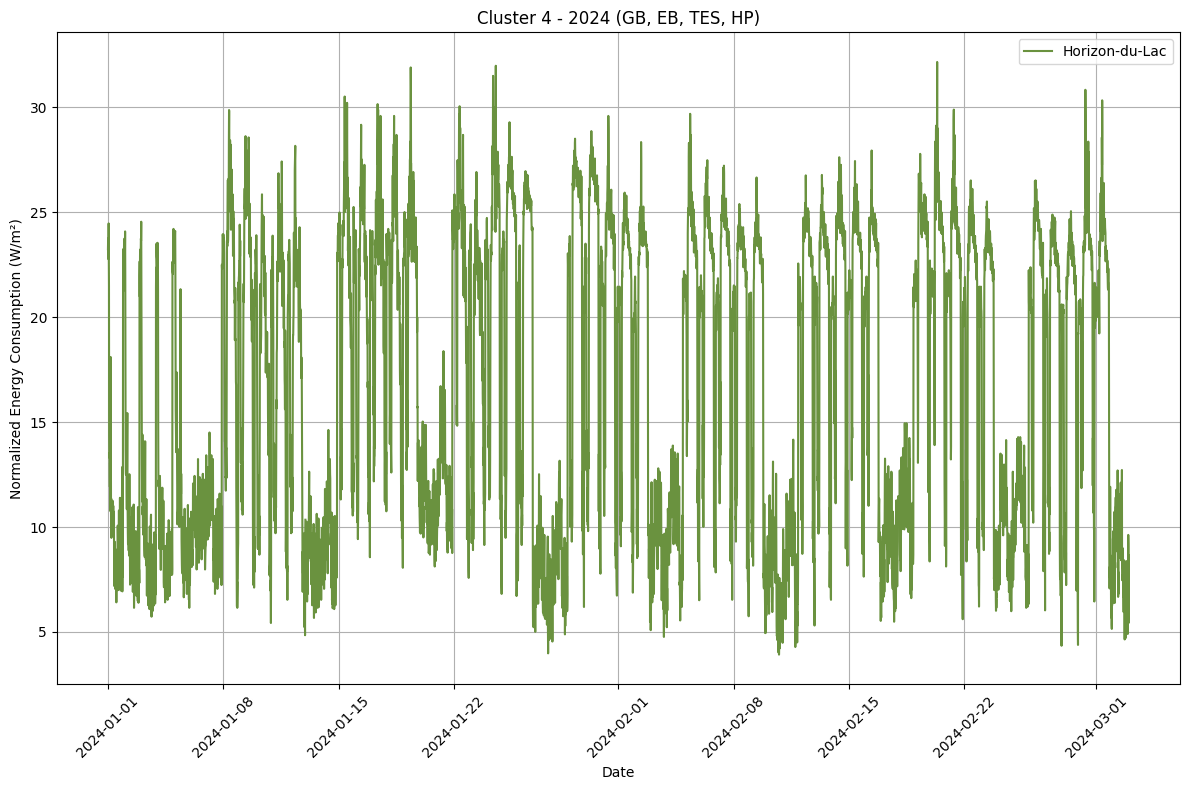

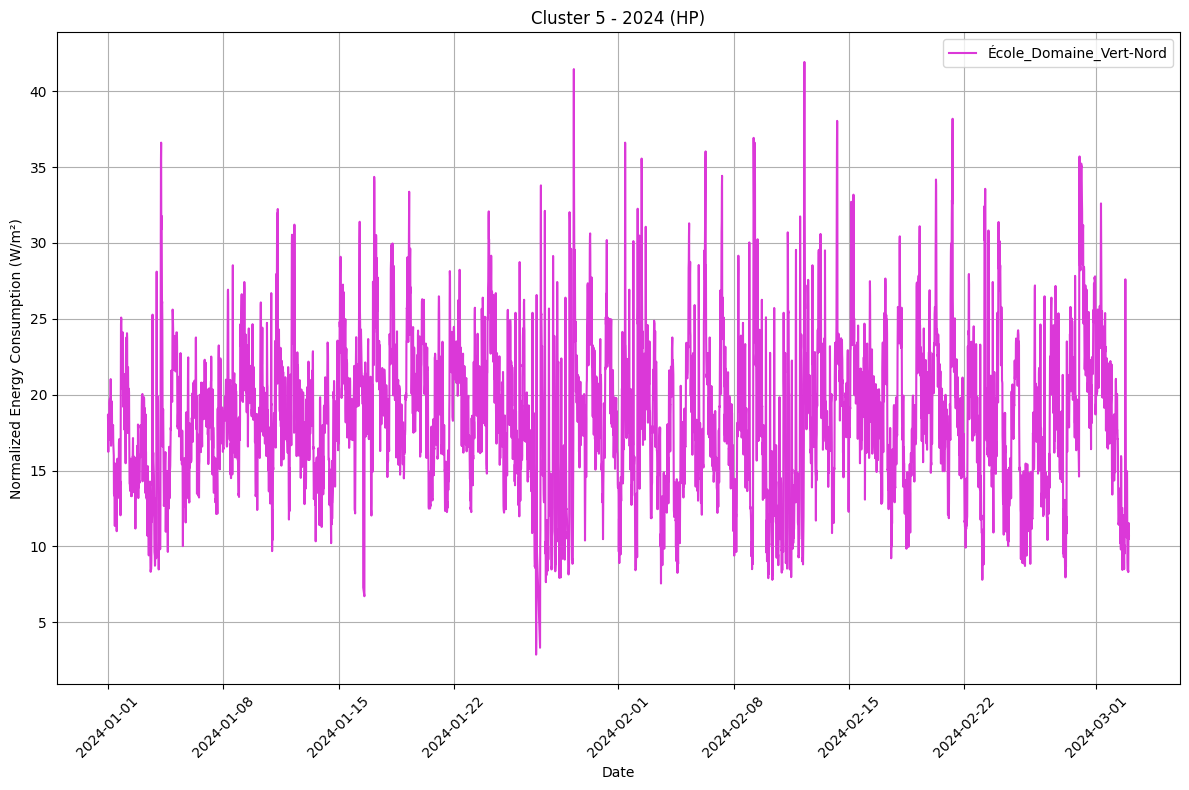

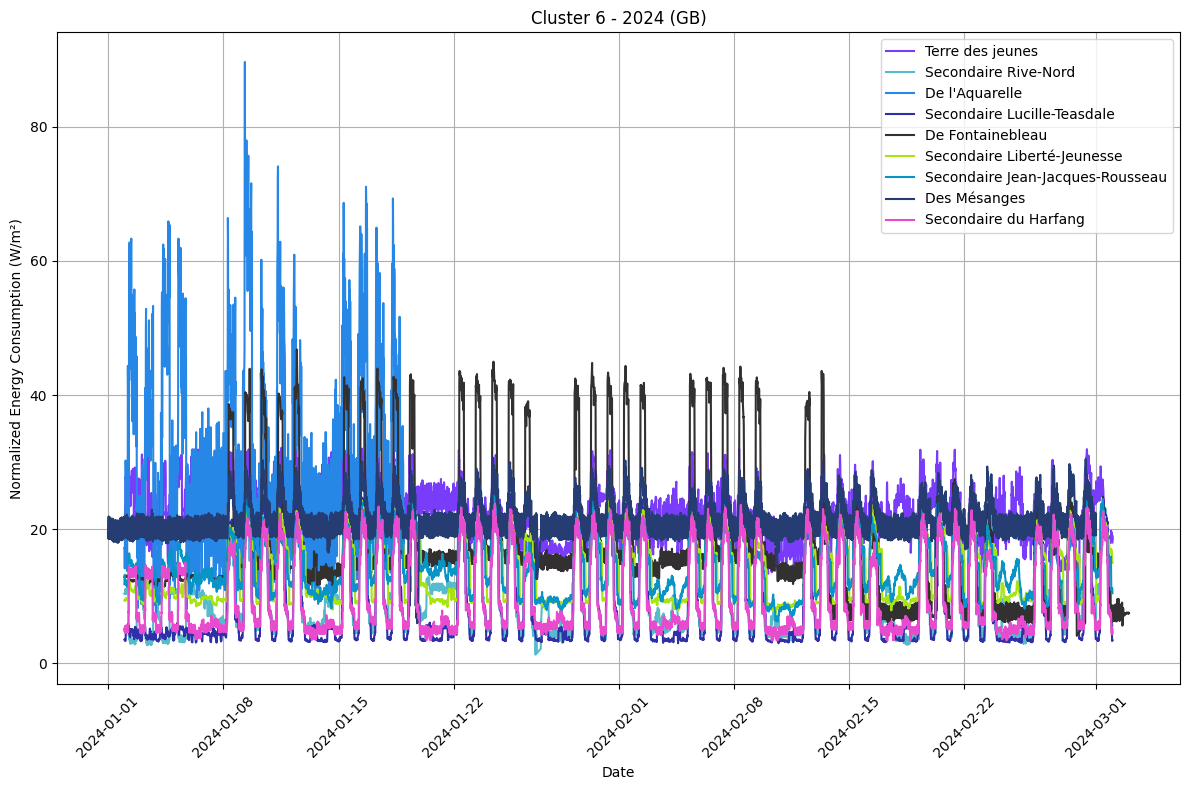

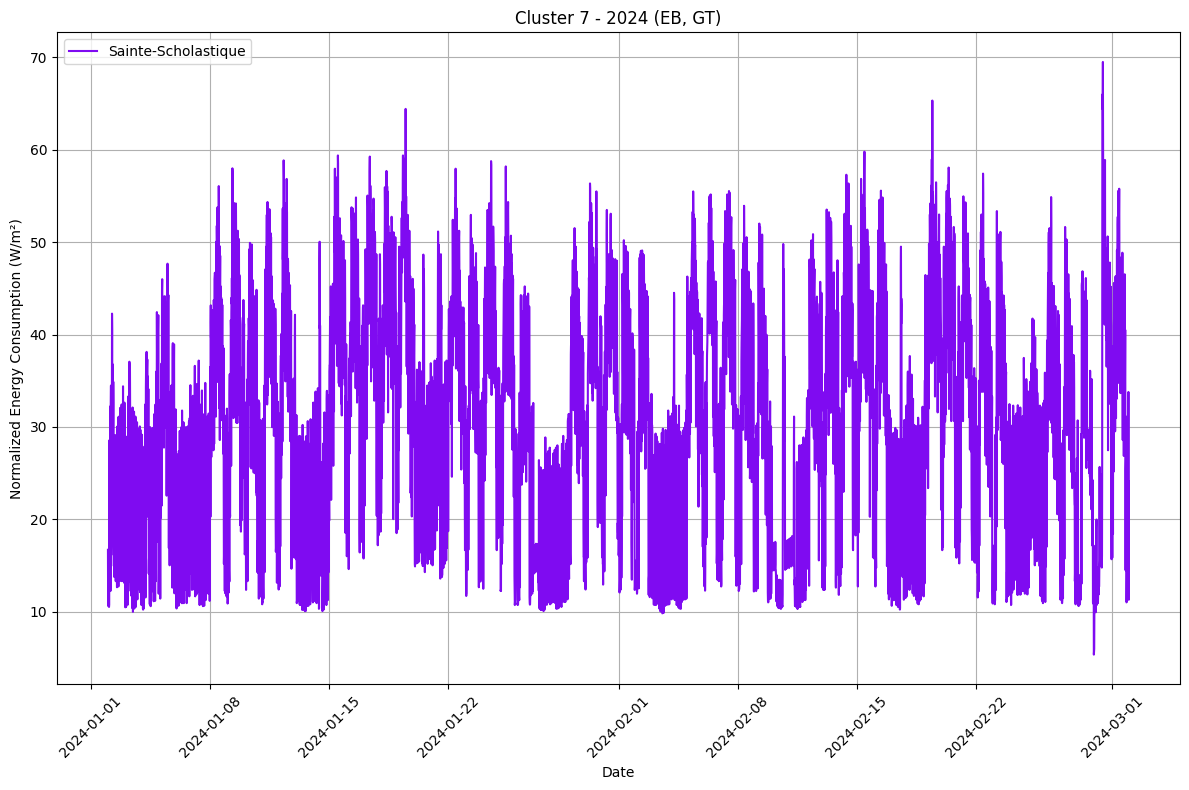

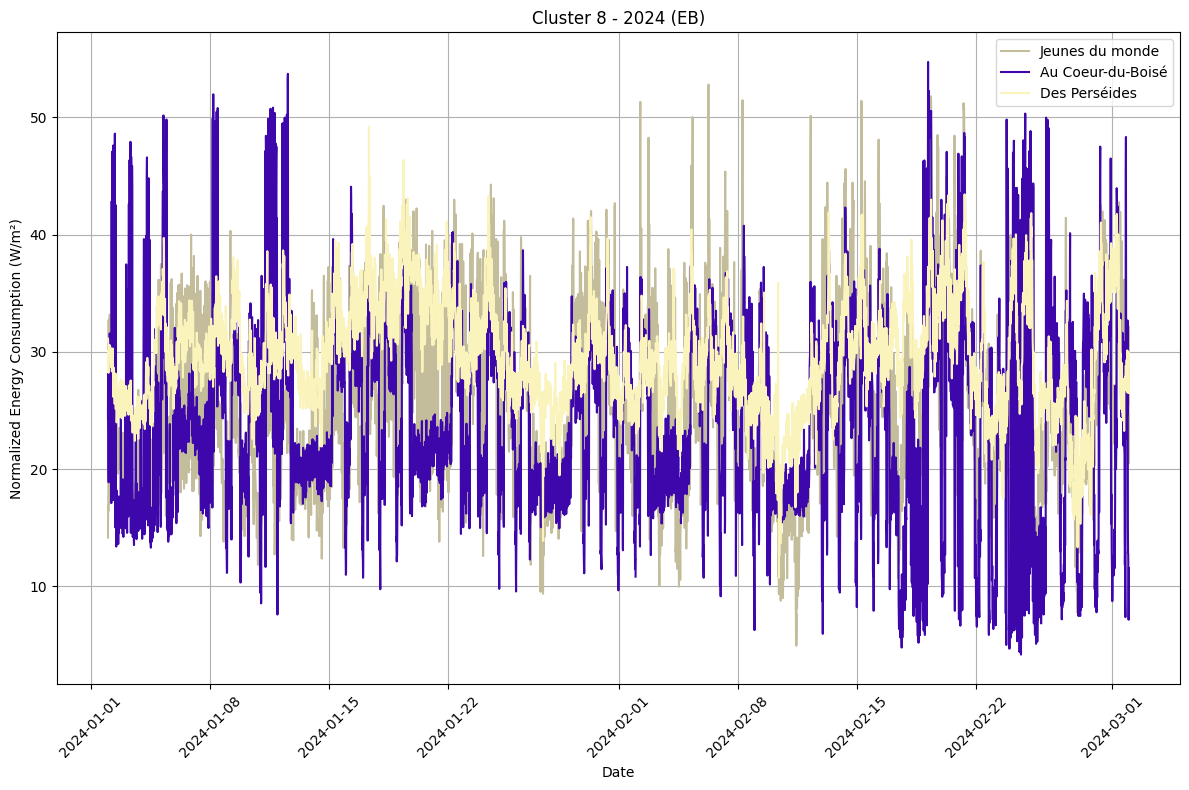

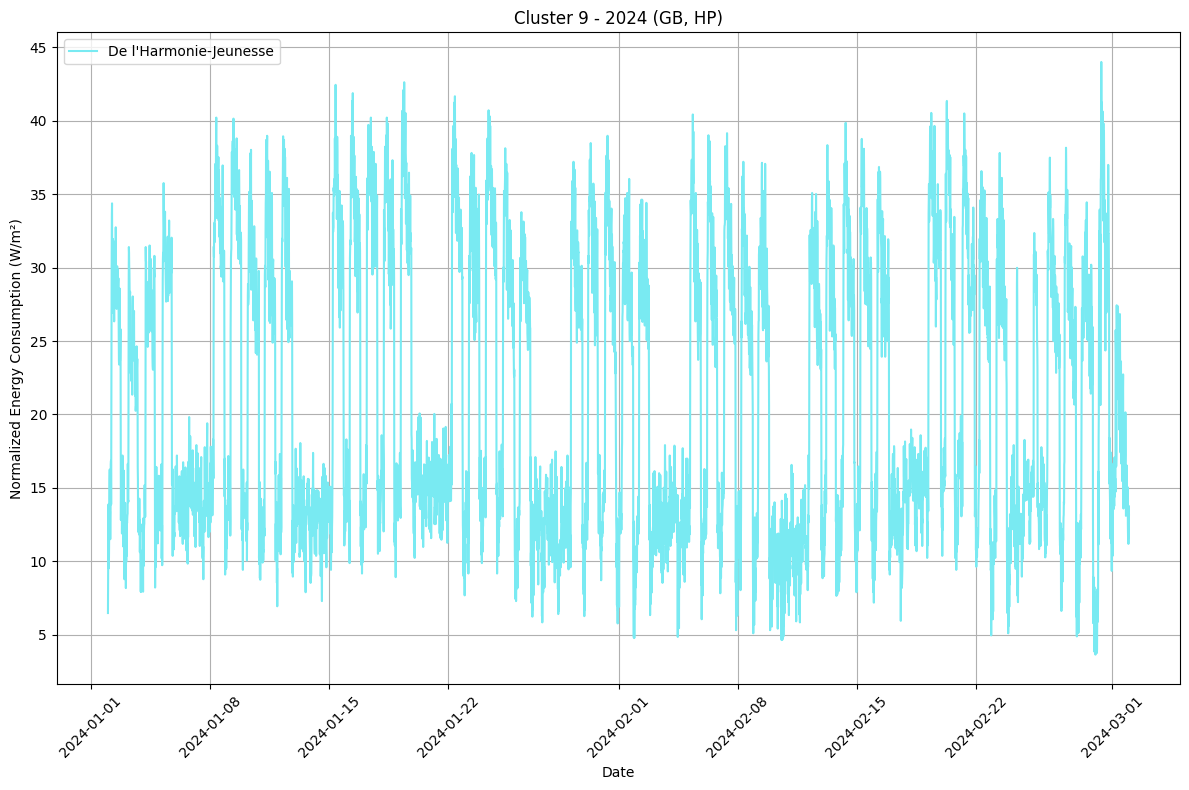

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random

# Floor areas for each school
floorAreas = {
    "Alpha": 7742,
    "Curé-Paquin": 4579,
    "Des_Perséides,pavillon_des_Primevères": 3108,
    "De_la_Clé-des-Champs": 2999,
    "Horizon-du-Lac": 4977,
    "Marie-Soleil-Tougas": 5478,
    "École_Domaine_Vert-Nord": 5717,
    "Sauvé": 3842,
    "Terre des jeunes": 3710,
    "Notre-Dame": 3512,
    "Secondaire Rive-Nord": 9780,
    "Sainte-Scholastique": 2442,
    "De la Clairière": 3220,
    "Jeunes du monde": 3598,
    "De l'Aquarelle": 3220,
    "Le Sentier": 3235,
    "Secondaire Lucille-Teasdale": 9899,
    "Saint-Gabriel (pavillon Saint-Gabriel)": 6205,
    "De Fontainebleau": 4275,
    "Arthur-Vaillancourt": 2626,
    "Des Moissons (pavillon Mgr Conrad-Chaumont)": 2957,
    "Secondaire du Harfang (pavillon Saint-François)": 3609,
    "Secondaire d'Oka": 16013,
    "Secondaire Liberté-Jeunesse": 8405,
    "Au Coeur-du-Boisé": 3157,
    "Secondaire Jean-Jacques-Rousseau": 13148,
    "Des Mésanges": 3929,
    "Des Perséides": 4252,
    "Secondaire du Harfang": 8234,
    "De l'Harmonie-Jeunesse": 2825,
}

# Mechanical equipment details for each school
equipment = {
    "Alpha": {"GB": 3, "EB": 1, "TES": 1, "HP": 0, "GT": 0},
    "Curé-Paquin": {"GB": 0, "EB": 1, "TES": 1, "HP": 0, "Radiant Heating": 1, "PV Panel": 1, "GT": 0},
    "Des_Perséides,pavillon_des_Primevères": {"GB": 0, "EB": 1, "TES": 1, "HP": 0, "GT": 0},
    "De_la_Clé-des-Champs": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Horizon-du-Lac": {"GB": 1, "EB": 1, "TES": 1, "HP": 36, "GT": 0},
    "Marie-Soleil-Tougas": {"GB": 0, "EB": 1, "TES": 1, "HP": 0, "GT": 0},
    "École_Domaine_Vert-Nord": {"GB": 0, "EB": 0, "TES": 0, "HP": 1, "GT": 0},
    "Sauvé": {"GB": 2, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Terre des jeunes": {"GB": 2, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Notre-Dame": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire Rive-Nord": {"GB": 2, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Sainte-Scholastique": {"GB": 0, "EB": 1, "TES": 0, "HP": 0, "GT": 1},
    "De la Clairière": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Jeunes du monde": {"GB": 0, "EB": 2, "TES": 0, "HP": 0, "GT": 0},
    "De l'Aquarelle": {"GB": 1, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Le Sentier": {"GB": 2, "EB": 2, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire Lucille-Teasdale": {"GB": 2, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Saint-Gabriel (pavillon Saint-Gabriel)": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "De Fontainebleau": {"GB": 1, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Arthur-Vaillancourt": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Des Moissons (pavillon Mgr Conrad-Chaumont)": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire du Harfang (pavillon Saint-François)": {"GB": 1, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire d'Oka": {"GB": 2, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire Liberté-Jeunesse": {"GB": 2, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Au Coeur-du-Boisé": {"GB": 0, "EB": 2, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire Jean-Jacques-Rousseau": {"GB": 2, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Des Mésanges": {"GB": 1, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "Des Perséides": {"GB": 0, "EB": 1, "TES": 0, "HP": 0, "GT": 0},
    "Secondaire du Harfang": {"GB": 1, "EB": 0, "TES": 0, "HP": 0, "GT": 0},
    "De l'Harmonie-Jeunesse": {"GB": 1, "EB": 0, "TES": 0, "HP": 2, "GT": 0},
}

# Function to create a unique key for each equipment configuration
def get_equipment_key(equip):
    equipment_types = ["GB", "EB", "TES", "HP", "GT"]
    return tuple((eq, equip.get(eq, 0) > 0) for eq in equipment_types)

# Filter data from the first Monday of January to the last Sunday of February
def filter_january_february(df, year):
    start_date = pd.to_datetime(f'{year}-01-01')
    if start_date.weekday() != 0:  # Not a Monday
        start_date += pd.DateOffset(days=(7 - start_date.weekday()))
    end_date = pd.to_datetime(f'{year}-02-28')
    if end_date.weekday() != 6:  # Not a Sunday
        end_date += pd.DateOffset(days=(6 - end_date.weekday()))
    return df[(df.iloc[:, 1] >= start_date) & (df.iloc[:, 1] <= end_date)]

# Function to process and plot each school's data for a specific year by cluster
def plot_clusters_by_equipment(year):
    clusters = {}

    # Group schools by equipment type
    for school_name, equip in equipment.items():
        equip_key = get_equipment_key(equip)
        if equip_key not in clusters:
            clusters[equip_key] = []
        clusters[equip_key].append(school_name)

    # Plot each cluster
    for i, (equip_key, schools) in enumerate(clusters.items(), start=1):
        equipment_description = ', '.join([eq for eq, present in equip_key if present])

        plt.figure(figsize=(12, 8))
        plt.title(f"Cluster {i} - {year} ({equipment_description})")

        for school_name in schools:
            schoolPath = f"/content/drive/MyDrive/🍁 /UdS/Thesis/Projects/{school_name}"
            floor_area = floorAreas.get(school_name, 0)
            if not os.path.isdir(schoolPath):
                print(f"Warning: Directory {schoolPath} does not exist.")
                continue

            csv_files = [f for f in os.listdir(schoolPath) if f.endswith('.csv')]
            color = (random.random(), random.random(), random.random())
            label_added = False  # Track if legend label is added for each school

            for file in csv_files:
                full_path = os.path.join(schoolPath, file)
                try:
                    df = pd.read_csv(full_path, delimiter=';', decimal=',')
                    df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')
                    df = df.dropna(subset=[df.columns[1]])

                    if df.shape[1] >= 3:
                        df.iloc[:, 2] = pd.to_numeric(df.iloc[:, 2], errors='coerce')
                        df = df.dropna(subset=[df.columns[2]])

                        # Filter data and normalize
                        df_filtered = filter_january_february(df, year)
                        if not df_filtered.empty:
                            normalized_values = (df_filtered.iloc[:, 2] / floor_area) * 1000
                            if not label_added:
                                plt.plot(df_filtered.iloc[:, 1], normalized_values, label=school_name, color=color)
                                label_added = True  # Add label only once for each school
                            else:
                                plt.plot(df_filtered.iloc[:, 1], normalized_values, color=color)

                except Exception as e:
                    print(f"Error processing file {file} in {schoolPath}: {e}")

        plt.xlabel("Date")
        plt.ylabel("Normalized Energy Consumption (W/m²)")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot clusters for 2023 and 2024
plot_clusters_by_equipment(2023)
plot_clusters_by_equipment(2024)


# New Section